In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import paddings
import os
from PIL import Image

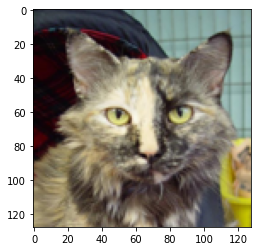

In [24]:
filepath = 'datasets\\catsanddogs\\Petimages\\Cat'
image_rgb = Image.open(filepath + '\\' + os.listdir(filepath)[2])
image_resized = image_rgb.resize((128, 128))
image = np.asarray(image_resized)

plt.imshow(image)

In [25]:
image.shape

(128, 128, 3)

In [26]:
kernel_shape = (3, 3, 3)
kernel = np.array([
    [[1], [0], [-1]],
    [[2], [0], [-2]],
    [[1], [0], [-1]]]) * np.ones((1, 1, kernel_shape[2]))

kernel_overhang = 1

kernel.shape

(3, 3, 3)

In [27]:
image_p = paddings.Zero(image, kernel_overhang)

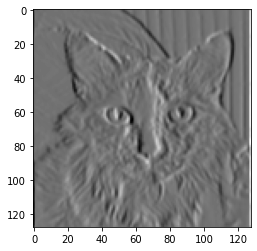

In [28]:
stride = 1
kernel_overhang = int((kernel.shape[0] - 1) / 2)
featuremap_shape = (image.shape[0], image.shape[1], 1)
feature_map = np.zeros(featuremap_shape)

# convolution
for y in range(int((image_p.shape[0] - 2 * kernel_overhang) / stride)):
    for x in range(int((image_p.shape[1] - 2 * kernel_overhang) / stride)):
        arr = image_p[y * stride :  y * stride + kernel.shape[0], x * stride : x * stride + kernel.shape[1], :]
        feature_map[y, x, 0] = np.sum(arr * kernel)

plt.imshow(feature_map, cmap='gray')